In [ ]:
import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB 

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [ ]:
data = pd.read_csv(f'PATH/implementation_sample_1.csv.gz',compression='gzip',lineterminator='\n');
y = data['class']
X = data.drop(['class'],axis=1)
NB_classifier = GaussianNB()
NB_classifier.fit(X, y)

GaussianNB()

              precision    recall  f1-score   support

         bot       0.59      0.72      0.65     39636
       human       0.79      0.67      0.73     60364

    accuracy                           0.69    100000
   macro avg       0.69      0.70      0.69    100000
weighted avg       0.71      0.69      0.70    100000



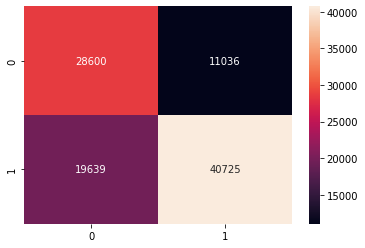

In [ ]:
y_predict_train = NB_classifier.predict(X)
print(classification_report(y, y_predict_train))
cm = confusion_matrix(y, y_predict_train)
sns.heatmap(cm, annot=True,fmt="d")


              precision    recall  f1-score   support

         bot       0.56      0.33      0.41       353
       human       0.51      0.73      0.60       340

    accuracy                           0.52       693
   macro avg       0.53      0.53      0.51       693
weighted avg       0.53      0.52      0.50       693

              precision    recall  f1-score   support

         bot       0.58      0.49      0.53      7102
       human       0.50      0.59      0.54      6174

    accuracy                           0.54     13276
   macro avg       0.54      0.54      0.54     13276
weighted avg       0.54      0.54      0.54     13276

              precision    recall  f1-score   support

         bot       0.66      0.28      0.39      1071
       human       0.62      0.89      0.73      1413

    accuracy                           0.63      2484
   macro avg       0.64      0.58      0.56      2484
weighted avg       0.64      0.63      0.58      2484

              preci

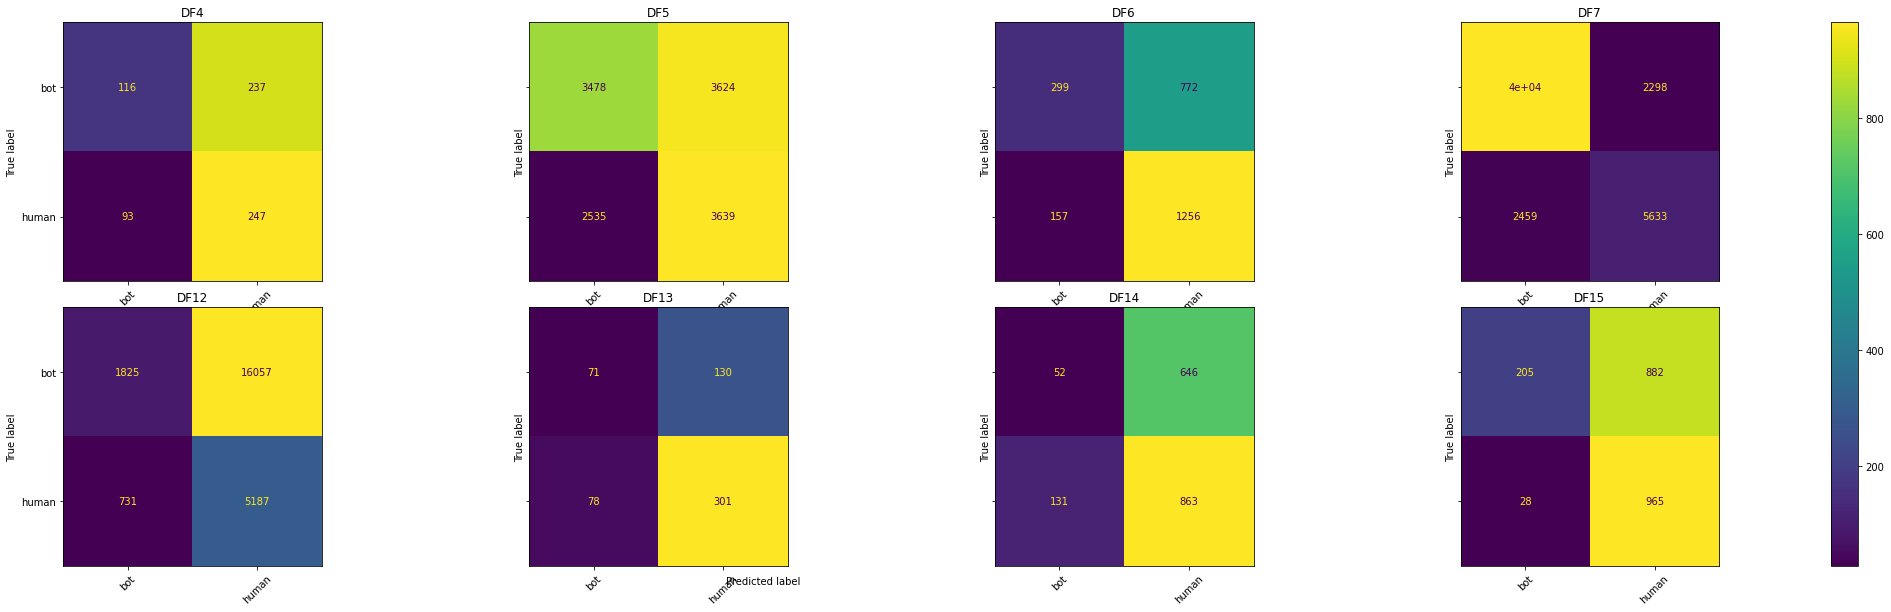

In [ ]:
datasets=["DF4","DF5","DF6","DF7","DF12","DF13","DF14","DF15"]
f, axes = plt.subplots(2, 4, figsize=(40, 10), sharey='row')

for index,dataset in enumerate(datasets):
  test = pd.read_csv(f'PATH/{dataset}.csv.gz',compression='gzip',lineterminator='\n');
  test= test.sample(frac=1).reset_index(drop=True)

  y_test_predict = NB_classifier.predict(test.drop(['class'],axis=1))
  print(classification_report(test['class'], y_test_predict))
  cf_matrix = confusion_matrix(test['class'], y_test_predict)
  disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
  disp.plot(ax=axes[int(np.floor(index/4))][index%4], xticks_rotation=45)
  disp.ax_.set_title(dataset)
  disp.im_.colorbar.remove()
  disp.ax_.set_xlabel('')


f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()